# 3. torch.eigensum

In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt
import pandas as pd
from fastai.data.all import *
from fastai.vision.all import * 

# 3. torch.eigensum

## A. transpose

In [8]:
tsr = torch.tensor([1,2,3,4,5,6]).reshape(3,2)
tsr 

In [9]:
tsr.t()

In [7]:
torch.einsum('ij -> ji',tsr) 

## B. 행렬곱

In [10]:
tsr1 = torch.tensor([1,2,3,4,5,6]).reshape(3,2)/6
tsr1 

In [12]:
tsr2 = torch.tensor([1,2.0]).reshape(2,1)
tsr2

In [13]:
tsr1 @ tsr2

In [14]:
torch.einsum('ij,jk -> ik',tsr1,tsr2) 

## C. 이미지변환

In [16]:
r = torch.zeros(16).reshape(4,4) + 1.0
g = torch.zeros(16).reshape(4,4)
b = torch.zeros(16).reshape(4,4)

In [25]:
img = torch.stack([r,g,b],axis=0).reshape(1,3,4,4)
img

In [34]:
img.shape

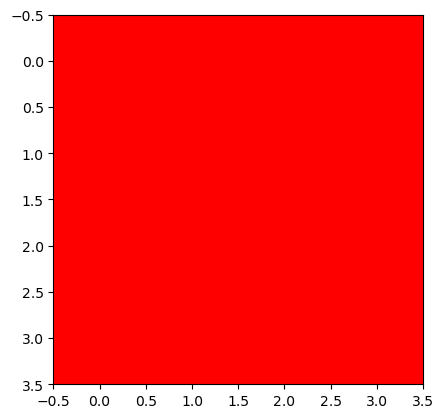

In [36]:
plt.imshow(torch.einsum('ocij -> ijc',img))

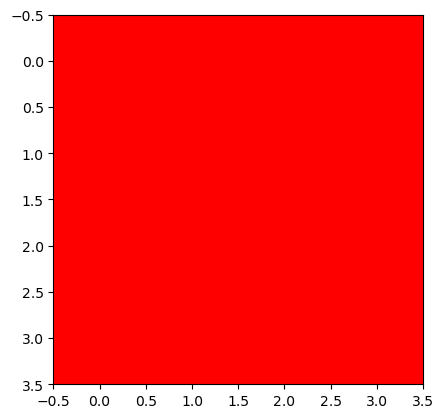

In [27]:
plt.imshow(torch.stack([r,g,b],axis=-1))

# 4. MNIST – 직접설계

In [3]:
path = untar_data(URLs.MNIST)
X0 = torch.stack([torchvision.io.read_image(str(fname)) for fname in (path/'training/0').ls()])
X1 = torch.stack([torchvision.io.read_image(str(fname)) for fname in (path/'training/1').ls()])
X2 = torch.stack([torchvision.io.read_image(str(fname)) for fname in (path/'training/2').ls()])
X = torch.concat([X0,X1,X2])/255
y = torch.nn.functional.one_hot(torch.tensor([0]*len(X0) + [1]*len(X1) + [2]*len(X2))).float()
X0 = torch.stack([torchvision.io.read_image(str(fname)) for fname in (path/'testing/0').ls()])
X1 = torch.stack([torchvision.io.read_image(str(fname)) for fname in (path/'testing/1').ls()])
X2 = torch.stack([torchvision.io.read_image(str(fname)) for fname in (path/'testing/2').ls()])
XX = torch.concat([X0,X1,X2])/255
yy = torch.nn.functional.one_hot(torch.tensor([0]*len(X0) + [1]*len(X1) + [2]*len(X2))).float()

In [4]:
print(X.shape,'\t',X.dtype)
print(y.shape,'\t\t',y.dtype)
print(XX.shape,'\t',XX.dtype)
print(yy.shape,'\t\t',yy.dtype)

torch.Size([18623, 1, 28, 28])   torch.float32
torch.Size([18623, 3])       torch.float32
torch.Size([3147, 1, 28, 28])    torch.float32
torch.Size([3147, 3])        torch.float32

## A. y: (n,3)-float

In [29]:
# step1: 데이터의 정리
ds1 = torch.utils.data.TensorDataset(X,y)
#ds2 = torch.utils.data.TensorDataset(XX,yy)
dl1 = torch.utils.data.DataLoader(ds1,batch_size=128)
#dl2 = torch.utils.data.DataLoader(ds2)
# step2: 학습에 필요한 오브젝트들을 선언 
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Conv2d(1,16,kernel_size=(2,2)),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(kernel_size=(2,2)),
    torch.nn.Flatten(),
    torch.nn.Linear(2704,3)
)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())
# step3: 학습을 하는 과정 = 적합을 하는 과정 
net.to("cuda:0")
for epoc in range(8):
    for xi,yi in dl1: 
        ## 1 
        ## 2 
        loss = loss_fn(net(xi.to("cuda:0")),yi.to("cuda:0"))
        ## 3 
        loss.backward()
        ## 4 
        optimizr.step()
        optimizr.zero_grad()
## step4: 
net.to("cpu")
print(f'train = {(net(X).argmax(axis=-1) == y.argmax(axis=-1)).float().mean():.4f}')
print(f'val = {(net(XX).argmax(axis=-1) == yy.argmax(axis=-1)).float().mean():.4f}')

train = 0.9410
val = 0.9431

## B. y: (n,)-int

In [34]:
y = y.argmax(axis=-1)
yy = yy.argmax(axis=-1)

In [35]:
print(X.shape,'\t',X.dtype)
print(y.shape,'\t\t',y.dtype)
print(XX.shape,'\t',XX.dtype)
print(yy.shape,'\t\t',yy.dtype)

torch.Size([18623, 1, 28, 28])   torch.float32
torch.Size([18623])          torch.int64
torch.Size([3147, 1, 28, 28])    torch.float32
torch.Size([3147])       torch.int64

In [37]:
# step1: 데이터의 정리
ds1 = torch.utils.data.TensorDataset(X,y)
#ds2 = torch.utils.data.TensorDataset(XX,yy)
dl1 = torch.utils.data.DataLoader(ds1,batch_size=128)
#dl2 = torch.utils.data.DataLoader(ds2)
# step2: 학습에 필요한 오브젝트들을 선언 
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Conv2d(1,16,kernel_size=(2,2)),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(kernel_size=(2,2)),
    torch.nn.Flatten(),
    torch.nn.Linear(2704,3)
)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())
# step3: 학습을 하는 과정 = 적합을 하는 과정 
net.to("cuda:0")
for epoc in range(8):
    for xi,yi in dl1: 
        ## 1 
        ## 2 
        loss = loss_fn(net(xi.to("cuda:0")),yi.to("cuda:0"))
        ## 3 
        loss.backward()
        ## 4 
        optimizr.step()
        optimizr.zero_grad()
## step4: 
net.to("cpu")
print(f'train = {(net(X).argmax(axis=-1) == y).float().mean():.4f}')
print(f'val = {(net(XX).argmax(axis=-1) == yy).float().mean():.4f}')

train = 0.9410
val = 0.9431

# 5. Fashion-MNIST – fastai

`-` Data

In [3]:
df_train=pd.read_csv('https://media.githubusercontent.com/media/guebin/PP2023/main/posts/fashion-mnist_train.csv')
df_test=pd.read_csv('https://media.githubusercontent.com/media/guebin/PP2023/main/posts/fashion-mnist_test.csv')
def rshp(row):
    return row.reshape(1,28,28)
X = torch.tensor(np.apply_along_axis(rshp,axis=1,arr=np.array(df_train.iloc[:,1:]))).float()
XX  = torch.tensor(np.apply_along_axis(rshp,axis=1,arr=np.array(df_test.iloc[:,1:]))).float()
y = torch.tensor(np.array(df_train.label))
yy  = torch.tensor(np.array(df_test.label))

In [4]:
print(X.shape,'\t',X.dtype)
print(y.shape,'\t\t',y.dtype)
print(XX.shape,'\t',XX.dtype)
print(yy.shape,'\t\t',yy.dtype)

torch.Size([60000, 1, 28, 28])   torch.float32
torch.Size([60000])          torch.int64
torch.Size([10000, 1, 28, 28])   torch.float32
torch.Size([10000])          torch.int64

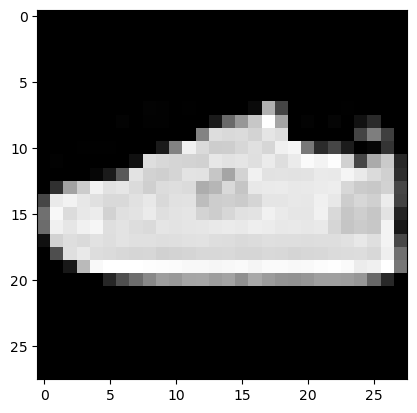

In [5]:
plt.imshow(torch.einsum('cij -> ijc', X[-1]),cmap='gray')

## A. torch

In [7]:
# step1: 데이터의 정리
ds1 = torch.utils.data.TensorDataset(X,y)
#ds2 = torch.utils.data.TensorDataset(XX,yy)
dl1 = torch.utils.data.DataLoader(ds1,batch_size=128)
#dl2 = torch.utils.data.DataLoader(ds2)
# step2: 학습에 필요한 오브젝트들을 선언 
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Conv2d(1,16,kernel_size=(2,2)),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(kernel_size=(2,2)),
    torch.nn.Flatten(),
    torch.nn.Linear(2704,10)
)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())
# step3: 학습을 하는 과정 = 적합을 하는 과정 
net.to("cuda:0")
for epoc in range(8):
    for xi,yi in dl1: 
        ## 1 
        ## 2 
        loss = loss_fn(net(xi.to("cuda:0")),yi.to("cuda:0"))
        ## 3 
        loss.backward()
        ## 4 
        optimizr.step()
        optimizr.zero_grad()
## step4: 
net.to("cpu")
print(f'train = {(net(X).argmax(axis=-1) == y).float().mean():.4f}')
print(f'val = {(net(XX).argmax(axis=-1) == yy).float().mean():.4f}')

train = 0.9123
val = 0.8814

## B. fastai

In [53]:
# step1: 데이터의 정리
ds1 = torch.utils.data.TensorDataset(X,y)
ds2 = torch.utils.data.TensorDataset(XX,yy)
dl1 = torch.utils.data.DataLoader(ds1,batch_size=128)
dl2 = torch.utils.data.DataLoader(ds2,batch_size=10000)
dls = DataLoaders(dl1,dl2)
# step2: 학습에 필요한 오브젝트들을 선언 
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Conv2d(1,16,kernel_size=(2,2)),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(kernel_size=(2,2)),
    torch.nn.Flatten(),
    torch.nn.Linear(2704,10)
)
loss_fn = torch.nn.CrossEntropyLoss()
lrnr = Learner(
    dls = dls,
    model = net,
    loss_func = loss_fn,
    #---#
    metrics=[accuracy]
)
# step3: 학습을 하는 과정 = 적합을 하는 과정 
lrnr.fit(10)
# step4 
lrnr.model.to("cpu")
print(f'train = {(lrnr.model(X).argmax(axis=-1) == y).float().mean():.4f}')
print(f'val = {(lrnr.model(XX).argmax(axis=-1) == yy).float().mean():.4f}')

train = 0.9139
val = 0.8804

# 6. ImageNet – 직접설계/transfer

## A. 알렉스넷(Krizhevsky, Sutskever, and Hinton 2012)의 의미

`-` 야사로 배우는 인공지능: <https://brunch.co.kr/@hvnpoet/109>

## B. 알렉스넷의 아키텍처 써보기

`-` 알렉스넷의 아키텍처:

-ref:
<https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/Comparison_image_neural_networks.svg/960px-Comparison_image_neural_networks.svg.png>

![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/Comparison_image_neural_networks.svg/960px-Comparison_image_neural_networks.svg.png)

`-` 재미삼아 써보면..

## C. 알렉스넷으로 ImageNet 적합 – HW

In [748]:
pass

Krizhevsky, Alex, Ilya Sutskever, and Geoffrey E Hinton. 2012. “Imagenet
Classification with Deep Convolutional Neural Networks.” *Advances in
Neural Information Processing Systems* 25.